In [10]:
import random
import cv2
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
 
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img
 


In [11]:
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('MRI_of_Human_Brain.jpg',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('MRI_of_Human_Brain_bruit2.jpg',
            add_noise(img))

True

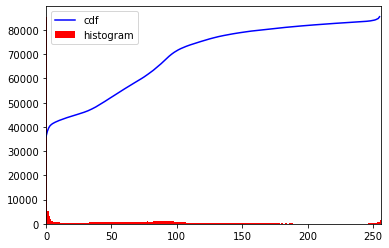

In [12]:
img = cv2.imread('MRI_of_Human_Brain_bruit2.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [13]:
img = cv2.imread('MRI_of_Human_Brain_bruit2.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.jpg',equ)

True

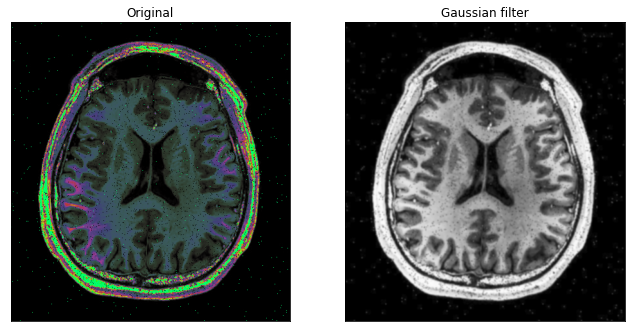

In [14]:
image = cv2.imread('res.jpg') # reads the image
image_ref = cv2.imread('MRI_of_Human_Brain_bruit2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
gb = cv2.GaussianBlur(image, (figure_size,figure_size),1,1)
cv2.imwrite('MRI_filter.jpg',gb)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image_ref, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(gb, cv2.COLOR_HSV2RGB)),plt.title('Gaussian filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("MRI_of_Human_Brain_Bruit2.jpg")
     compressed = cv2.imread("res.jpg", 1)
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       


In [16]:
main()

PSNR value is 29.96505883562375 dB


In [17]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    
    indexer = filter_size // 2
    
    new_image = data.copy()
    
    nrow, ncol = data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            
            
            max_value = max(temp)
            
            min_value = min(temp)
            
            if data[i,j] > max_value:
                
                new_image[i,j] = max_value
            
            elif data[i,j] < min_value:
                
                new_image[i,j] = min_value
            
            temp =[]
    
    return new_image.copy()

In [18]:
img = cv2.imread('res.jpg',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('res2.jpg',
            conservative_smoothing_gray(img,5))

True